In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
seoul_pop_list=sorted(glob.glob('../raw_data/seoul_population_raw/*.csv'))

In [3]:
df_mapper=pd.read_csv("../raw_data/seoul_population_raw/mapper.csv")
df_mapper.loc[:,['행정동','행정동코드']]
mapper_dict={i['행정동코드']:i['행정동'] for i in df_mapper.loc[:,['행정동','행정동코드']].to_dict('records')}

In [27]:
sum_list = list()
for i in range(0,10,3):
    df_a = pd.read_csv(seoul_pop_list[i],index_col=False,on_bad_lines='skip')
    try:
        df_b = pd.read_csv(seoul_pop_list[i+1],index_col=False,on_bad_lines='skip')
    except:
        df_b = pd.read_csv(seoul_pop_list[i+1],index_col=False,on_bad_lines='skip',encoding='cp949')
    df_c = pd.read_csv(seoul_pop_list[i+2],index_col=False,on_bad_lines='skip')

    df_tot=pd.concat([df_a,df_b,df_c])

    df_tot.set_index("기준일ID",inplace=True)
    df_tot.index=pd.to_datetime(df_tot.index, format = '%Y%m%d')
    df_tot['행정동']=df_tot['행정동코드'].map(mapper_dict)
    df_temp=df_tot.copy()
    df_temp=df_temp.loc[:,['행정동','시간대구분',
    '남자0세부터9세생활인구수', '남자10세부터14세생활인구수','남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
    '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수','남자45세부터49세생활인구수', 
    '여자0세부터9세생활인구수','여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수','여자25세부터29세생활인구수', 
    '여자30세부터34세생활인구수', '여자35세부터39세생활인구수','여자40세부터44세생활인구수', '여자45세부터49세생활인구수','총생활인구수']]
    tmp=(df_temp.groupby('행정동').max()-df_temp.groupby('행정동').mean())/df_temp.groupby('행정동').std()
    tmp['총생활인구수']=tmp.iloc[:,1:-1].sum(axis=1)
    sum_list.append(pd.DataFrame(tmp['총생활인구수']).rename(columns={'총생활인구수':f'{2017+i}'}))

/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70856/1697916731.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_a = pd.read_csv(seoul_pop_list[i],index_col=False,on_bad_lines='skip')
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70856/1697916731.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_b = pd.read_csv(seoul_pop_list[i+1],index_col=False,on_bad_lines='skip')
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70856/1697916731.py:8: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_c = pd.read_csv(seoul_pop_list[i+2],index_col=False,on_bad_lines='skip')
/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_70856/1697916731.py:3: ParserWarning: Length of header or names does not match length of data.

In [29]:
df_tot=pd.concat(sum_list,axis=1)

In [31]:
df_tot['sum'] = df_tot.sum(axis=1)

In [35]:
df_tot.columns = ['2017','2018','2019','2020','sum']

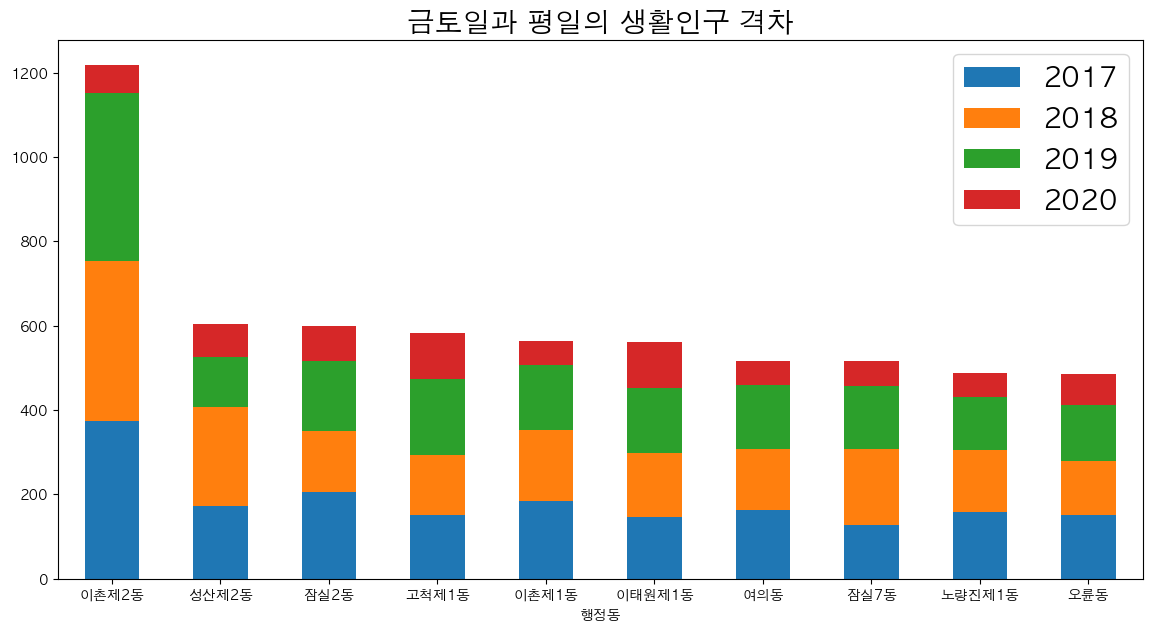

In [36]:
df_tot.sort_values('sum',ascending=False).head(10).iloc[:,:-1].plot(kind='bar', stacked=True,figsize=(14,7))
plt.xticks(rotation=0)
plt.title('금토일과 평일의 생활인구 격차',fontsize=20)
plt.legend(fontsize=20)
plt.show()